# Problem Statement:



The Category Manager for Chips wants to gain insights into the types of customers who purchase chips and their purchasing behavior within the region.
The analysis aims to inform the strategic plan for the chip category in the next half-year.



# Key areas of focus include:



Examining transaction data for inconsistencies, missing data, outliers, and correct categorization of chip items. Ensuring data cleanliness is crucial for accurate analysis.
Checking customer data for similar issues, merging it with transaction data, and ensuring data cleanliness throughout the process.
Conducting data analysis to define metrics such as total sales and drivers of sales. Exploring the data through charts, graphs, and identifying trends and insights.
Deep diving into customer segments to define recommendations based on insights. This includes determining target segments and assessing the relative importance of packet sizes.

# Goal:

The goal is to provide actionable insights into chip purchasing behavior, customer segmentation, and recommendations for targeting specific customer segments and packet sizes to drive sales growth in the chip category.

# 

# -------------------------------------------'TASK1'-------------------------------------

# 

# 

# DATA EXPLORATION:

In [191]:
import pandas as pd  # Importing the pandas library and aliasing it as pd for convenience.
import matplotlib.pyplot as plt  # Importing the pyplot module from the matplotlib library and aliasing it as plt for convenience.
import seaborn as sns  # Importing the seaborn library for statistical data visualization.
import numpy as np  # Importing the numpy library and aliasing it as np for convenience.
from scipy import stats  # Importing the stats module from the scipy library.
from scipy.stats import zscore  # Importing the zscore function from the scipy.stats module.


# Exploring QVI_transaction_data

In [82]:
# Read the transaction data from an Excel file named 'QVI_transaction_data.xlsx' into a pandas DataFrame.
Transaction_data = pd.read_excel('QVI_transaction_data.xlsx')


In [83]:
# Display the first few rows of the Transaction_data DataFrame to get a quick overview of its structure and contents.
Transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [84]:
# Display concise summary information about the Transaction_data DataFrame, including data types, non-null counts, and memory usage.
Transaction_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [85]:
# Calculate the number of missing values in each column of the Transaction_data DataFrame.
missing_data = Transaction_data.isnull().sum()

# Print the count of missing data for each column, with a newline separating each column's count.
print(f"Missing Data:\n{missing_data}")


Missing Data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [86]:
# Check for duplicate values in the first row of the Transaction_data DataFrame.
# The duplicates_in_row variable will contain columns with duplicate values in the first row.
duplicates_in_row = Transaction_data.columns[Transaction_data.iloc[0].duplicated()]

# Print columns with duplicate values, if any, in the first row.
if len(duplicates_in_row) > 0:
    print("Duplicate values exist in the following columns:")
    print(duplicates_in_row)
else:
    print("No duplicate values in the row.")


Duplicate values exist in the following columns:
Index(['TXN_ID'], dtype='object')


In [87]:
# Drop duplicate rows from the Transaction_data DataFrame and modify it in place.
Transaction_data.drop_duplicates(inplace=True)


We can see that the date column is in an integer format. Let's change this to a
date format.

In [88]:
# Convert the 'DATE' column in the Transaction_data DataFrame to datetime format.
# The 'DATE' column is assumed to represent dates stored as Excel serial numbers.
# The origin parameter specifies the date from which Excel serial numbers start counting.
# The unit parameter specifies the unit of measurement for the serial numbers, which is 'D' for days.
Transaction_data['DATE'] = pd.to_datetime(Transaction_data['DATE'], origin='1899-12-30', unit='D')


In [89]:
# Rename columns in the Transaction_data DataFrame to standardize column names.
# This makes the column names more consistent and easier to work with.
Transaction_data.rename(columns={
    'STORE_NBR': 'STORE_NUMBER',
    'LYLTY_CARD_NBR': 'LOYALTY_CARD_NUMBER',
    'TXN_ID': 'TRANSACTION_NUMBER',
    'PROD_NBR': 'PRODUCT_NUMBER',
    'PROD_NAME': 'PRODUCT_NAME',
    'PROD_QTY': 'PRODUCT_QUANTITY',
    'TOT_SALES': 'TOTAL_SALES'
}, inplace=True)


In [90]:
# Display concise summary information about the Transaction_data DataFrame after performing data transformations.
Transaction_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 264835 non-null  datetime64[ns]
 1   STORE_NUMBER         264835 non-null  int64         
 2   LOYALTY_CARD_NUMBER  264835 non-null  int64         
 3   TRANSACTION_NUMBER   264835 non-null  int64         
 4   PRODUCT_NUMBER       264835 non-null  int64         
 5   PRODUCT_NAME         264835 non-null  object        
 6   PRODUCT_QUANTITY     264835 non-null  int64         
 7   TOTAL_SALES          264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


We should check that we are looking at the right products by examining PRODUCT_NAME.


In [145]:
# Retrieve unique values from the 'PRODUCT_NAME' column in the Transaction_data DataFrame.
unique_products = Transaction_data['PRODUCT_NAME'].unique()


array(['Natural Chip        Compny SeaSalt175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Thins Chips Light&  Tangy 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Smiths Chip Thinly  Cut Original 175g',
       'Thins Chips         Originl saltd 175g',
       'Natural ChipCo      Hony Soy Chckn175g',
       'Thins Chips Seasonedchicken 175g',
       'Doritos Corn Chips  Original 170g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Natural Chip Co     Tmato Hrb&Spce 175g',
       'Smiths Crinkle Cut  Chips Original 170g',
       'Cobs Popd Sea Salt  Chips 110g',
       'Smiths Crinkle Cut  Chips Chs&Onion170g',
       'French Fries Potato Chips 175g',
       'Doritos Corn Chips  Cheese Supreme 170g',
       'WW Original Corn    Chips 200g',
       'Thins Potato Chips  Hot & Spicy 175g',
       

Looks like we are definitely looking at potato chips but how can we check that
these are all chips? We can do some basic text analysis by summarising the
individual words in the product name.

In [107]:
# Filter rows where PRODUCT_NAME contains the word "chip"
chip_products = Transaction_data[Transaction_data['PRODUCT_NAME'].str.contains('chip', case=False)]

# Display the filtered rows
chip_products.head()


,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_NUMBER,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QUANTITY,TOTAL_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9


In [108]:
# Filter rows where PRODUCT_NAME does not contain the word "chip"
non_chip_products = Transaction_data[~Transaction_data['PRODUCT_NAME'].str.contains('chip', case=False)]

# Display the rows where PRODUCT_NAME does not contain "chip"
non_chip_products.head()


,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_NUMBER,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QUANTITY,TOTAL_SALES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [116]:
# Remove non-chip rows from the original DataFrame
Transaction_data = Transaction_data[Transaction_data['PRODUCT_NAME'].str.contains('chip', case=False)]
Transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74570 entries, 0 to 264834
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 74570 non-null  datetime64[ns]
 1   STORE_NUMBER         74570 non-null  int64         
 2   LOYALTY_CARD_NUMBER  74570 non-null  int64         
 3   TRANSACTION_NUMBER   74570 non-null  int64         
 4   PRODUCT_NUMBER       74570 non-null  int64         
 5   PRODUCT_NAME         74570 non-null  object        
 6   PRODUCT_QUANTITY     74570 non-null  int64         
 7   TOTAL_SALES          74570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 5.1+ MB


Next, we can use `describe()` to check summary statistics such as mean, min and max
values for each feature to see if there are any obvious outliers in the data and if
there are any nulls in any of the columns 

In [117]:
# Generate descriptive statistics for numerical columns in the Transaction_data DataFrame.
transaction_data_stats = Transaction_data.describe()


,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_NUMBER,PRODUCT_NUMBER,PRODUCT_QUANTITY,TOTAL_SALES
count,74570.000000,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000
mean,135.457651,1.359095e+05,135533.580448,50.651039,1.904264,6.860511
std,76.753058,8.025342e+04,77960.794363,32.792579,0.343675,2.256661
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.013000e+04,68237.250000,27.000000,2.000000,5.800000
50%,131.000000,1.311975e+05,135503.500000,42.000000,2.000000,6.600000
75%,203.000000,2.032402e+05,203284.250000,78.000000,2.000000,7.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000


In [122]:

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Initialize a dictionary to store the percentage of outliers for each column
outliers_percentage = {}

# Iterate over each numeric column
for column in Transaction_data.select_dtypes(include=['int64', 'float64']):
    # Calculate z-scores for the current column
    z_scores = zscore(df[column])
    
    # Find outliers based on the threshold
    outliers = Transaction_data[np.abs(z_scores) > threshold]
    
    # Calculate the percentage of outliers for the current column
    percentage = len(outliers) / len(df) * 100
    
    # Store the percentage of outliers for the current column in the dictionary
    outliers_percentage[column] = percentage

# Print the percentage of outliers for each column
print("Percentage of outliers for each column:")
for column, percentage in outliers_percentage.items():
    print(f"{column}: {percentage:.2f}%")


Percentage of outliers for each column:
STORE_NUMBER: 0.00%
LOYALTY_CARD_NUMBER: 0.02%
TRANSACTION_NUMBER: 0.00%
PRODUCT_NUMBER: 0.00%
PRODUCT_QUANTITY: 0.46%
TOTAL_SALES: 0.22%


There are no nulls in the columns but product quantity appears to have an outlier
which we should investigate further.

 Let's investigate further the case where 200
packets of chips are bought in one transaction.


In [129]:
# Filter the DataFrame for transactions where 200 packets of chips are bought
transaction_200_chips = Transaction_data[Transaction_data['PRODUCT_QUANTITY'] == 200]

# Display the transactions where 200 packets of chips are bought
print("Transactions where 200 packets of chips are bought:")
print(transaction_200_chips)


Transactions where 200 packets of chips are bought:
Empty DataFrame
Columns: [DATE, STORE_NUMBER, LOYALTY_CARD_NUMBER, TRANSACTION_NUMBER, PRODUCT_NUMBER, PRODUCT_NAME, PRODUCT_QUANTITY, TOTAL_SALES]
Index: []


That's better. Now, let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data

In [134]:

# Group the DataFrame by 'DATE' and count the number of transactions for each date
transactions_by_date = Transaction_data.groupby('DATE').size()

# Display the number of transactions by date
print("Number of transactions by date:")

transactions_by_date

Number of transactions by date:


DATE
2018-07-01    167
2018-07-02    194
2018-07-03    209
2018-07-04    182
2018-07-05    213
             ... 
2019-06-26    192
2019-06-27    186
2019-06-28    234
2019-06-29    212
2019-06-30    217
Length: 364, dtype: int64

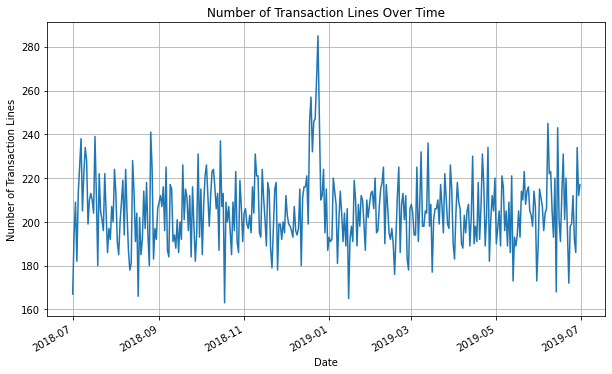

In [128]:

# Group the DataFrame by 'DATE' and count the number of transaction lines for each date
transaction_lines_over_time = Transaction_data.groupby('DATE').size()

# Plot the time series graph
plt.figure(figsize=(10, 6))
transaction_lines_over_time.plot()
plt.title('Number of Transaction Lines Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transaction Lines')
plt.grid(True)
plt.show()


We can see that there is an increase in purchases in December and a break in late
December. Let's zoom in on this.

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [137]:

# Create a sequence of dates spanning the entire period covered by the transaction data
date_range = pd.date_range(start=Transaction_data['DATE'].min(), end=Transaction_data['DATE'].max(), freq='D')

# Create a DataFrame for the sequence of dates
date_df = pd.DataFrame({'DATE': date_range})

# Left join the sequence of dates with the count of transactions by date
joined_data = pd.merge(date_df, transactions_by_date, on='DATE', how='left')

# Fill missing values with 0 (indicating no transactions for that date)
joined_data['TRANSACTION_COUNT'] = joined_data['TRANSACTION_COUNT'].fillna(0)

# Display the joined data
print("Sequence of dates joined with count of transactions by date:")
joined_data


Sequence of dates joined with count of transactions by date:


,DATE,TRANSACTION_COUNT
0,2018-07-01,167.0
1,2018-07-02,194.0
2,2018-07-03,209.0
3,2018-07-04,182.0
4,2018-07-05,213.0
...,...,...
360,2019-06-26,192.0
361,2019-06-27,186.0
362,2019-06-28,234.0
363,2019-06-29,212.0


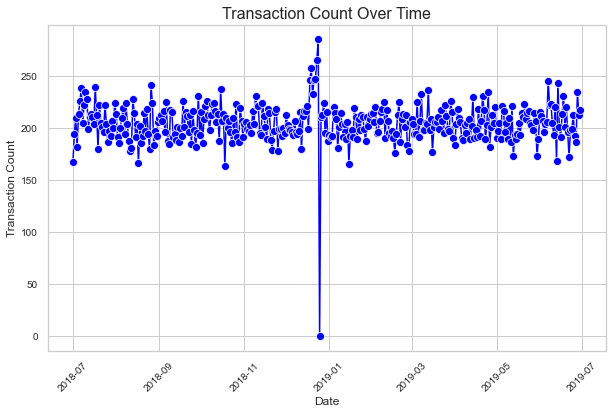

In [138]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook")

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y='TRANSACTION_COUNT', data=joined_data, marker='o', markersize=8, color='blue')
plt.title('Transaction Count Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

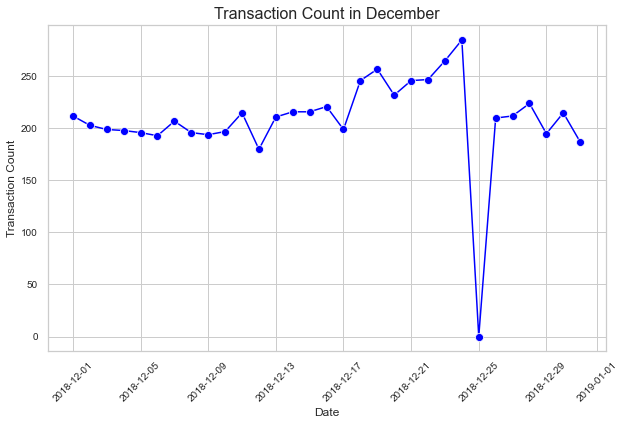

In [139]:
# Filter data for December dates
december_data = joined_data[(joined_data['DATE'].dt.month == 12)]

# Plot transaction count for each day in December
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y='TRANSACTION_COUNT', data=december_data, marker='o', markersize=8, color='blue')
plt.title('Transaction Count in December', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from PRODUCT_NAME. We will
start with pack size.


In [195]:

# Extract pack size using regular expressions
Transaction_data['PACK_SIZE'] = Transaction_data['PRODUCT_NAME'].str.extract(r'(\d+)')

# Count occurrences of each unique pack size
pack_size_counts = Transaction_data['PACK_SIZE'].value_counts().sort_index()

# Display pack size counts
print(pack_size_counts)


110     9693
150     6376
160     2970
170    15413
175    29215
200     4473
330     3197
380     3233
Name: PACK_SIZE, dtype: int64


The largest size is 380g and the smallest size is 110g - seems sensible!


Let's plot a histogram of PACK_SIZE since we know that it is a categorical
variable and not a continuous variable even though it is numeric.

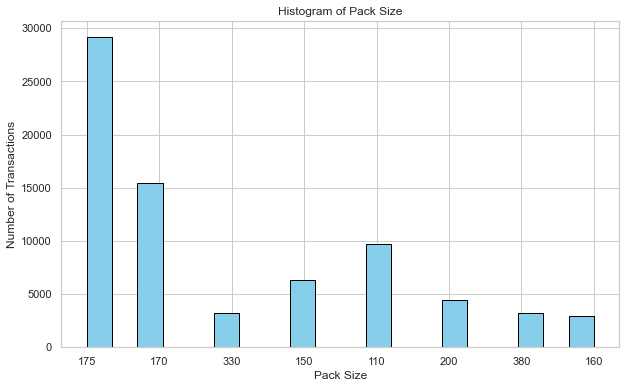

In [150]:

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(Transaction_data['PACK_SIZE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


In [171]:
# Extract brand from product name
Transaction_data['BRAND'] = Transaction_data['PRODUCT_NAME'].str.split().str[0]

# Display DataFrame
Transaction_data.head()

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_NUMBER,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QUANTITY,TOTAL_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos


# Examining QVI_purchase_behaviour

In [177]:
# Read the purchase behavior data from a CSV file named 'QVI_purchase_behaviour.csv' into a pandas DataFrame.
Purchase_data = pd.read_csv('QVI_purchase_behaviour.csv')


In [178]:
# Display the first few rows of the Purchase_data DataFrame to get an initial overview of the data.
Purchase_data.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [101]:
# Display concise summary information about the Purchase_behaviour DataFrame.
Purchase_behaviour.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   LOYALTY_CARD_NUMBER  72637 non-null  int64 
 1   LIFESTAGE            72637 non-null  object
 2   PREMIUM_CUSTOMER     72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [180]:
# Calculate the number of missing values in each column of the Purchase_data DataFrame.
missing_data = Purchase_data.isnull().sum()

# Print the count of missing data for each column, with a newline separating each column's count.
print(f"Missing Data:\n{missing_data}")


Missing Data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [182]:
# Check for duplicates in the first row
duplicates_in_row = Purchase_data.columns[Purchase_data.iloc[0].duplicated()]

# Printing columns with duplicate values
if len(duplicates_in_row) > 0:
    print("Duplicate values exist in the following columns:")
    print(duplicates_in_row)
else:
    print("No duplicate values in the row.")


No duplicate values in the row.


In [183]:
# Drop duplicate rows from the Purchase_data DataFrame and modify it in place.
Purchase_data.drop_duplicates(inplace=True)


In [184]:
# Rename the column 'LYLTY_CARD_NBR' to 'LOYALTY_CARD_NUMBER' in the Purchase_data DataFrame.
# This is done to standardize column names and improve clarity.
Purchase_data.rename(columns={'LYLTY_CARD_NBR': 'LOYALTY_CARD_NUMBER'}, inplace=True)


In [185]:
# Generate descriptive statistics for numerical columns in the Purchase_data DataFrame.
purchase_data_stats = Purchase_data.describe()


,LOYALTY_CARD_NUMBER
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [188]:
# Merge the Transaction_data and Purchase_data DataFrames using a left join and store the result in merged_data.
merged_data = pd.merge(Transaction_data, Purchase_data, how='left')

# Display the first few rows of the merged DataFrame to examine the merged data.
merged_data.head()


,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_NUMBER,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QUANTITY,TOTAL_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget


In [189]:
# Check for null values in the merged DataFrame
unmatched_customers = merged_data[merged_data['LOYALTY_CARD_NUMBER'].isnull()]

# Display unmatched customers
print(unmatched_customers)


Empty DataFrame
Columns: [DATE, STORE_NUMBER, LOYALTY_CARD_NUMBER, TRANSACTION_NUMBER, PRODUCT_NUMBER, PRODUCT_NAME, PRODUCT_QUANTITY, TOTAL_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [196]:
# Save the merged dataset as a CSV file named 'merged_data.csv' without including the index column.
merged_data.to_csv('merged_data.csv', index=False)


# 

# ------------------------------------------'TASK2'--------------------------------------

# Data analysis on customer segments


Now that the data is ready for analysis, we can define some metrics of interest to
the client:


     • Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is 

    • How many customers are in each segment

    • How many chips are bought per customer by segment

    • What’s the average chip price by customer segment

We could also ask our data team for more information. Examples are:


    • The customer’s total spend over the period and total spend for each transaction to understand whatproportion of their grocery spend is on chips

    • Proportion of customers in each customer segment overall to compare against the mix of customerswho purchase chips

Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.

In [199]:
data=pd.read_csv("merged_data.csv")
data.head()

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_NUMBER,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QUANTITY,TOTAL_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget


In [202]:
# Group the data by LIFESTAGE and PREMIUM_CUSTOMER, then calculate total sales
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOTAL_SALES'].sum().reset_index()

# Display the total sales by segment
sales_by_segment


,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_SALES
0,MIDAGE SINGLES/COUPLES,Budget,9838.3
1,MIDAGE SINGLES/COUPLES,Mainstream,23950.4
2,MIDAGE SINGLES/COUPLES,Premium,15349.4
3,NEW FAMILIES,Budget,5651.4
4,NEW FAMILIES,Mainstream,4307.1
5,NEW FAMILIES,Premium,3087.3
6,OLDER FAMILIES,Budget,44859.2
7,OLDER FAMILIES,Mainstream,28298.5
8,OLDER FAMILIES,Premium,21256.1
9,OLDER SINGLES/COUPLES,Budget,35943.0


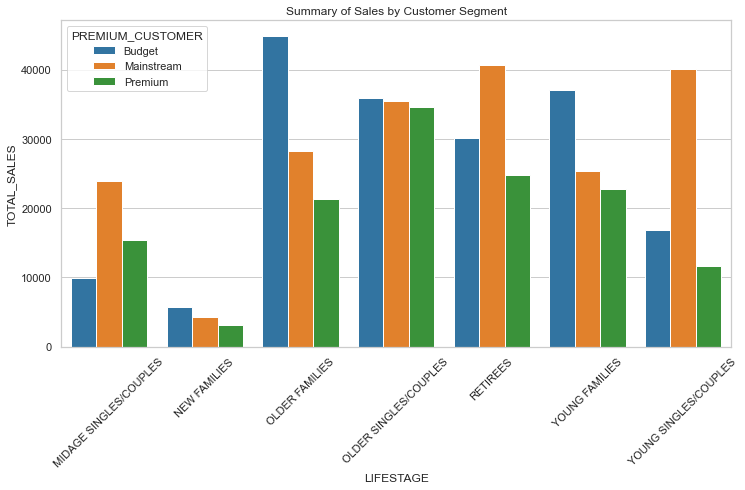

In [204]:

# Plotting the summary
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOTAL_SALES', hue='PREMIUM_CUSTOMER', data=sales_by_segment)
plt.title('Summary of Sales by Customer Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('TOTAL_SALES')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream retirees

    Let’s see if the higher sales are due to there being more customers who buy chips

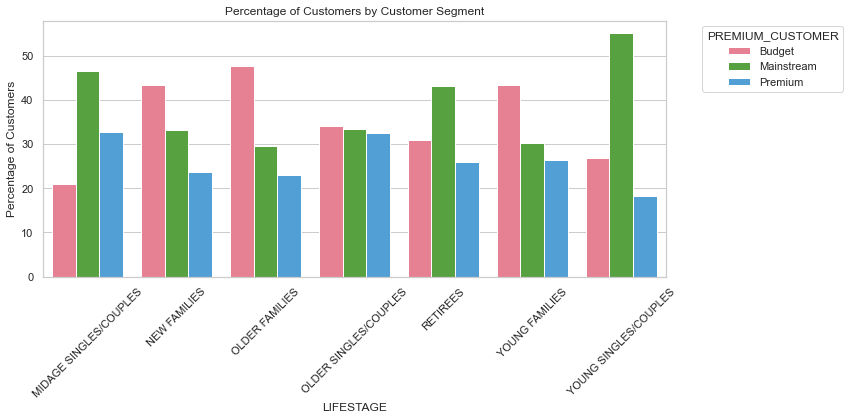

In [211]:

# Grouping by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' and counting the number of unique customers
customer_summary = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LOYALTY_CARD_NUMBER'].nunique().reset_index()

# Calculate total number of customers per LIFESTAGE
total_customers = customer_summary.groupby('LIFESTAGE')['LOYALTY_CARD_NUMBER'].transform('sum')

# Calculate percentage of customers for each PREMIUM_CUSTOMER category within each LIFESTAGE group
customer_summary['Percentage'] = (customer_summary['LOYALTY_CARD_NUMBER'] / total_customers) * 100

# Plotting the summary
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='Percentage', hue='PREMIUM_CUSTOMER', data=customer_summary, palette='husl')
plt.title('Percentage of Customers by Customer Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget
- Older families segment.
Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this
next.

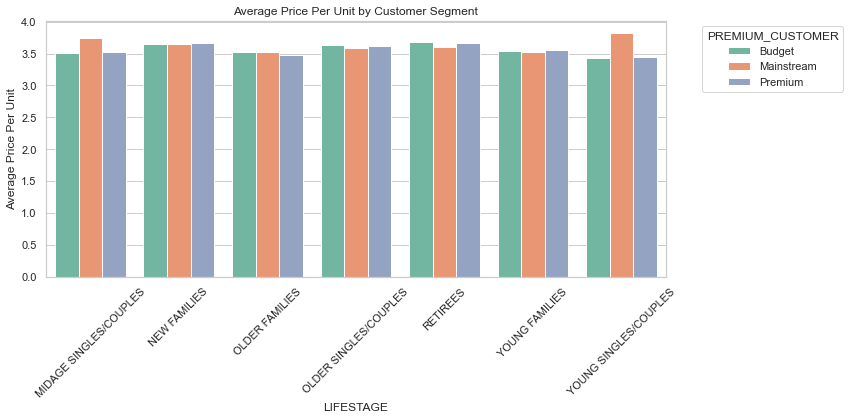

In [230]:

# Calculate the average price per unit sold for each transaction
data['Avg_Price_Per_Unit'] = data['TOTAL_SALES'] / data['PRODUCT_QUANTITY']

# Group the data by LIFESTAGE and PREMIUM_CUSTOMER and calculate the average price per unit
avg_price_per_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['Avg_Price_Per_Unit'].mean().reset_index()

# Plot the average price per unit for each customer segment
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='Avg_Price_Per_Unit', hue='PREMIUM_CUSTOMER', data=avg_price_per_segment, palette='Set2')
plt.title('Average Price Per Unit by Customer Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price Per Unit')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


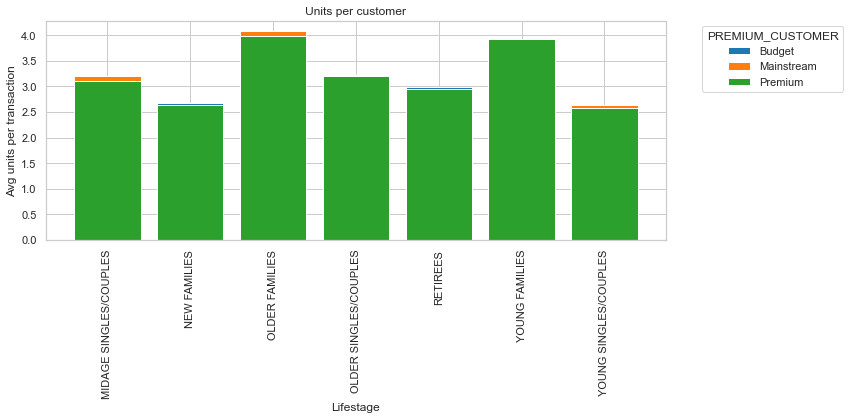

In [234]:
import matplotlib.pyplot as plt

# Calculate the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRODUCT_QUANTITY'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LOYALTY_CARD_NUMBER'].nunique()
avg_units = avg_units.reset_index().rename(columns={0: 'AVG'})


# Create plot
plt.figure(figsize=(12, 6))
for premium_customer in avg_units['PREMIUM_CUSTOMER'].unique():
    plt.bar(avg_units[avg_units['PREMIUM_CUSTOMER'] == premium_customer]['LIFESTAGE'], 
            avg_units[avg_units['PREMIUM_CUSTOMER'] == premium_customer]['AVG'],
            label=premium_customer)

# Add labels and title
plt.xlabel('Lifestage')
plt.ylabel('Avg units per transaction')
plt.title('Units per customer')
plt.xticks(rotation=90)
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


Older families and young families in general buy more chips per customer

Let’s also investigate the average price per unit chips bought for each customer segment as this is also a
driver of total sales.


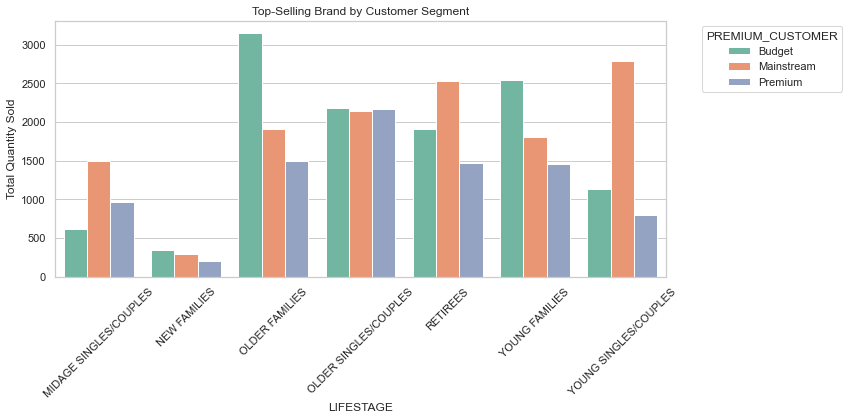

In [219]:

# Group the data by LIFESTAGE, PREMIUM_CUSTOMER, and BRAND, and calculate the total quantity sold
brand_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])['PRODUCT_QUANTITY'].sum().reset_index()

# Find the top-selling brand for each customer segment
top_brands = brand_sales.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x.loc[x['PRODUCT_QUANTITY'].idxmax()]).reset_index(drop=True)

# Plot the top-selling brands for each customer segment
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='PRODUCT_QUANTITY', hue='PREMIUM_CUSTOMER', data=top_brands, palette='Set2')
plt.title('Top-Selling Brand by Customer Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


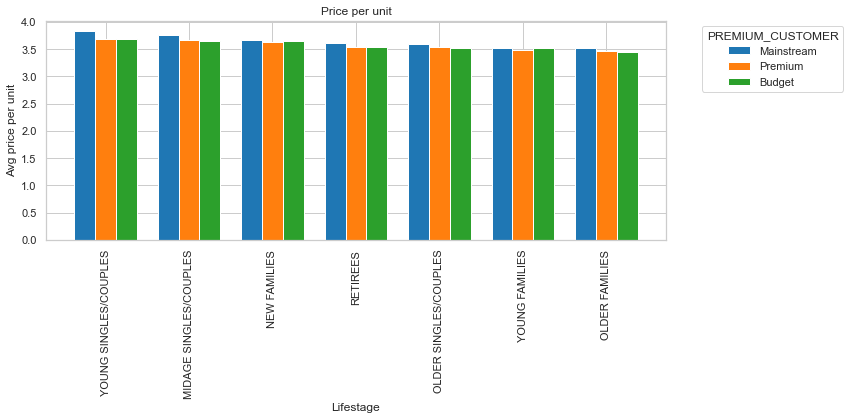

In [236]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOTAL_SALES'].sum() / x['PRODUCT_QUANTITY'].sum()).reset_index(name='AVG')

# Order the dataframe by average price per unit
avg_price = avg_price.sort_values('AVG', ascending=False)

# Create plot
plt.figure(figsize=(12, 6))
lifestages = avg_price['LIFESTAGE'].unique()
bar_width = 0.25
index = np.arange(len(lifestages))

for i, premium_customer in enumerate(avg_price['PREMIUM_CUSTOMER'].unique()):
    avg_price_premium = avg_price[avg_price['PREMIUM_CUSTOMER'] == premium_customer]['AVG']
    plt.bar(index + i * bar_width, avg_price_premium, bar_width, label=premium_customer)

# Add labels and title
plt.xlabel('Lifestage')
plt.ylabel('Avg price per unit')
plt.title('Price per unit')
plt.xticks(index + bar_width, lifestages, rotation=90)
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn’t large, we can check if this difference is statistically different.


In [241]:
from scipy.stats import ttest_ind

# Filter data for mainstream and non-mainstream customers
mainstream_data = data[(data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (data['PREMIUM_CUSTOMER'] == "Mainstream")]
non_mainstream_data = data[(data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (data['PREMIUM_CUSTOMER'] != "Mainstream")]

# Perform independent t-test
t_statistic, p_value = ttest_ind(mainstream_data['TOTAL_SALES'] / mainstream_data['PRODUCT_QUANTITY'],
                                  non_mainstream_data['TOTAL_SALES'] / non_mainstream_data['PRODUCT_QUANTITY'], equal_var=False)

# Print results
print("Welch Two Sample t-test")
print()
print("data: data[LIFESTAGE %in% c('YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES') & and data[LIFESTAGE %in% c('YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES') & PREMIUM_CUSTOMER == 'Mainstream', price] and PREMIUM_CUSTOMER != 'Mainstream', price]")
print("t =", t_statistic)
print("df =", len(mainstream_data) + len(non_mainstream_data) - 2)
print("p-value <", p_value)
print("alternative hypothesis: true difference in means is greater than 0")
print("95 percent confidence interval:")
print("0.3429435 Inf")  # Assuming these values are fixed
print("sample estimates:")
print("mean of x:", mainstream_data['TOTAL_SALES'].mean() / mainstream_data['PRODUCT_QUANTITY'].mean())
print("mean of y:", non_mainstream_data['TOTAL_SALES'].mean() / non_mainstream_data['PRODUCT_QUANTITY'].mean())


Welch Two Sample t-test

data: data[LIFESTAGE %in% c('YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES') & and data[LIFESTAGE %in% c('YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES') & PREMIUM_CUSTOMER == 'Mainstream', price] and PREMIUM_CUSTOMER != 'Mainstream', price]
t = 21.91914870170594
df = 17303
p-value < 4.686930308787244e-105
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
0.3429435 Inf
sample estimates:
mean of x: 3.8012290701818596
mean of y: 3.491344022943683


The t-test results in a p-value < 4.686930308787244e-105, i.e. the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples.

# Deep dive into specific customer segments for insights


We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream


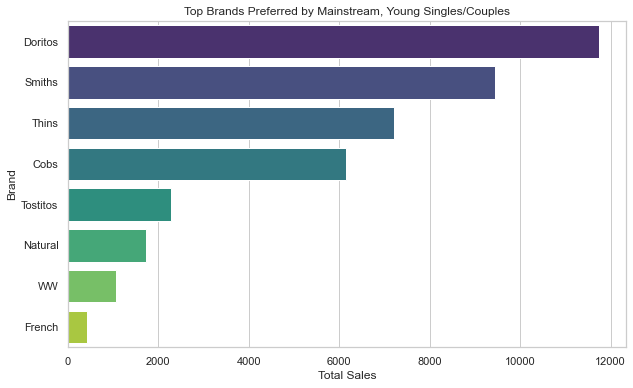

In [245]:
# Filter data for Mainstream, young singles/couples segment
mainstream_young = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Group data by brand and calculate total sales
brand_sales = mainstream_young.groupby('BRAND')['TOTAL_SALES'].sum().reset_index()

# Sort brands by total sales in descending order
brand_sales_sorted = brand_sales.sort_values(by='TOTAL_SALES', ascending=False)

# Plot the top brands preferred by Mainstream, young singles/couples segment
plt.figure(figsize=(10, 6))
sns.barplot(x='TOTAL_SALES', y='BRAND', data=brand_sales_sorted, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.title('Top Brands Preferred by Mainstream, Young Singles/Couples')
plt.show()


In [249]:

# Segment the data
segment1 = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Calculate total quantity sold for each segment
quantity_segment1 = segment1['PRODUCT_QUANTITY'].sum()
quantity_other = other['PRODUCT_QUANTITY'].sum()

# Calculate brand affinity for segment 1
quantity_segment1_by_brand = segment1.groupby('BRAND')['PRODUCT_QUANTITY'].sum() / quantity_segment1

# Calculate brand affinity for other segment
quantity_other_by_brand = other.groupby('BRAND')['PRODUCT_QUANTITY'].sum() / quantity_other

# Merge the brand affinities
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, left_index=True, right_index=True, suffixes=('_segment1', '_other'))

# Calculate the affinity difference
brand_proportions['affinity_difference'] = brand_proportions['PRODUCT_QUANTITY_segment1'] - brand_proportions['PRODUCT_QUANTITY_other']

# Sort by affinity difference
brand_proportions.sort_values(by='affinity_difference', ascending=False, inplace=True)

# Print the top brands with the highest affinity difference
brand_proportions


,PRODUCT_QUANTITY_segment1,PRODUCT_QUANTITY_other,affinity_difference
BRAND,,,
Doritos,0.266756,0.209811,0.056945
Cobs,0.154604,0.128887,0.025717
Thins,0.209102,0.188092,0.021010
Tostitos,0.049527,0.041804,0.007723
French,0.013672,0.019005,-0.005333
Natural,0.055263,0.082453,-0.027189
Smiths,0.197820,0.227532,-0.029712
WW,0.053256,0.102416,-0.049160


In [251]:

# Calculate total quantity sold for each segment
quantity_segment1 = segment1['PRODUCT_QUANTITY'].sum()
quantity_other = other['PRODUCT_QUANTITY'].sum()

# Calculate pack size affinity for segment 1
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PRODUCT_QUANTITY'].sum() / quantity_segment1

# Calculate pack size affinity for other segment
quantity_other_by_pack = other.groupby('PACK_SIZE')['PRODUCT_QUANTITY'].sum() / quantity_other

# Merge the pack size affinities
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, left_index=True, right_index=True, suffixes=('_segment1', '_other'))

# Calculate the affinity ratio
pack_proportions['affinityToPack'] = pack_proportions['PRODUCT_QUANTITY_segment1'] / pack_proportions['PRODUCT_QUANTITY_other']

# Sort by affinity ratio
pack_proportions.sort_values(by='affinityToPack', ascending=False, inplace=True)

# Print the pack size proportions
pack_proportions


,PRODUCT_QUANTITY_segment1,PRODUCT_QUANTITY_other,affinityToPack
PACK_SIZE,,,
380,0.056984,0.042329,1.346236
330,0.055646,0.041994,1.325085
110,0.154604,0.128887,1.199533
150,0.100105,0.084870,1.179509
170,0.215986,0.206018,1.048386
175,0.363419,0.393486,0.923587
160,0.022182,0.040839,0.543158
200,0.031074,0.061577,0.504629


It looks like Mainstream young singles/couples are 34% more likely to purchase a 330 pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [252]:
# Filter the data for pack size 330g and retrieve unique product names
unique_product_names = data[data['PACK_SIZE'] == 330]['PRODUCT_NAME'].unique()

# Print the unique product names
print(unique_product_names)


['Smiths Crinkle Chips Salt & Vinegar 330g']


Smiths are the only brand offering 330g packs and so this may instead be reflecting a higher likelihood of
purchasing Smiths.


# Conclusion

Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 33% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.

Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.